<a href="https://colab.research.google.com/github/DakshMalhotra15/NYC-taxi-fare-analysis/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### problem statement-https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction/data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


loading the data


In [ ]:
url = "https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv"
df = pd.read_csv(url)

Preprocess the Data

In [ ]:
df.head()


,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [ ]:
df = df.dropna(how="any", axis=0)
df = df.drop(["unique_id"], axis=1)
df["date_time_of_pickup"] = pd.to_datetime(df["date_time_of_pickup"])
df["year"] = df["date_time_of_pickup"].dt.year
df["month"] = df["date_time_of_pickup"].dt.month
df["day"] = df["date_time_of_pickup"].dt.day
df["hours"] = df["date_time_of_pickup"].dt.hour
df = df.drop(["date_time_of_pickup"], axis=1)

In [ ]:

def haversine(lat1, lon1, lat2, lon2):

  # convert decimal degrees to radians
  lon1=np.deg2rad(lon1.to_numpy())
  lat1=np.deg2rad(lat1.to_numpy())
  lon2=np.deg2rad(lon2.to_numpy())
  lat2=np.deg2rad(lat2.to_numpy())

  # haversine formula
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
  c = 2 * np.arcsin(np.sqrt(a))
  r = 6372.8 # Radius of earth in kilometers
  return np.around(c * r, decimals=2)



In [ ]:
df['peak_hours'] = df['hours'].apply(lambda x: 1 if x in [18,19,20] else 0)
#Adding 'distance_travelled' column extracted using haversine function
df['distance_travelled'] = haversine(df['latitude_of_pickup'],df['longitude_of_pickup'],\
                                            df['latitude_of_dropoff'],df['longitude_of_dropoff'])

In [ ]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hours,peak_hours,distance_travelled
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0,1.03
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,0,8.45
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,0,1.39
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,0,2.80
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,0,2.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   longitude_of_pickup   50000 non-null  float64
 2   latitude_of_pickup    50000 non-null  float64
 3   longitude_of_dropoff  50000 non-null  float64
 4   latitude_of_dropoff   50000 non-null  float64
 5   no_of_passenger       50000 non-null  int64  
 6   year                  50000 non-null  int64  
 7   month                 50000 non-null  int64  
 8   day                   50000 non-null  int64  
 9   hours                 50000 non-null  int64  
 10  peak_hours            50000 non-null  int64  
 11  distance_travelled    50000 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 4.6 MB


Dropping nan values


In [ ]:
def clean_data(df):
    df = df[
        ((df['amount'] > 0) & (df['amount'] <= 200)) &
        ((df['longitude_of_pickup'] > -75) & (df['longitude_of_pickup'] < -73)) &
        ((df['latitude_of_pickup'] > 40) & (df['latitude_of_pickup'] < 42)) &
        ((df['longitude_of_dropoff'] > -75) & (df['longitude_of_dropoff'] < -73)) &
        ((df['latitude_of_pickup'] > 40) & (df['latitude_of_dropoff'] < 42)) &
        ((df['no_of_passenger'] > 0) & (df['no_of_passenger'] <= 6)) &
        ((df['distance_travelled'] > 0) & (df['distance_travelled'] <= 200))

    ]
    return df

In [ ]:
clean_data(df)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hours,peak_hours,distance_travelled
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0,1.03
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,0,8.45
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,0,1.39
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,0,2.80
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,0,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,8.5,-73.976212,40.744832,-73.981567,40.724635,1,2012,10,13,19,1,2.29
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,12,23,0,4.94
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,22,17,0,0.87
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,30,4,0,2.26


Exploratory data analysis

<Axes: title={'center': 'Correlation Heatmap'}>

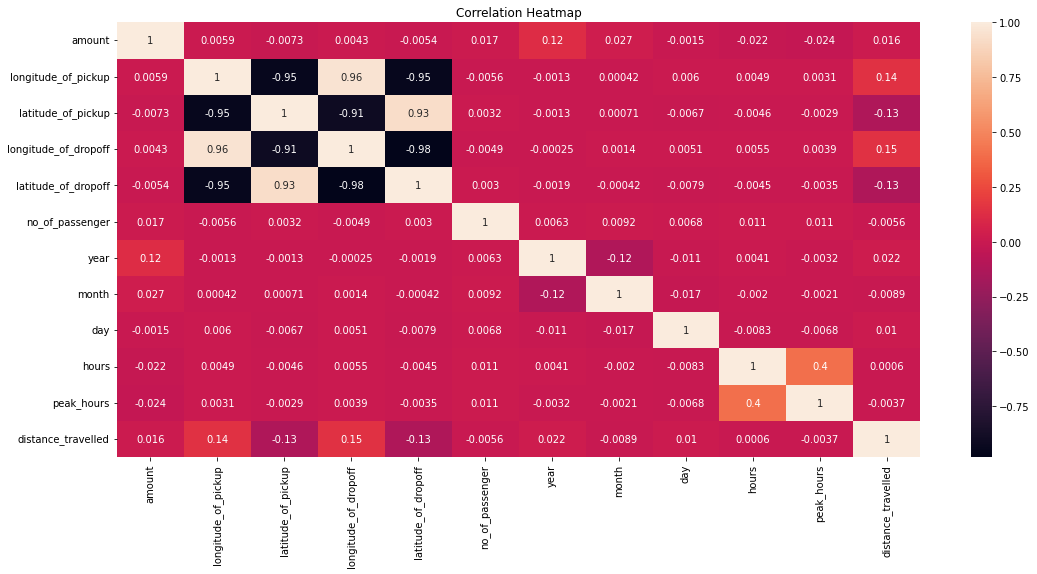

In [ ]:
plt.figure(figsize = (18,8))
plt.title('Correlation Heatmap')
corr = df.corr()
corr
sns.heatmap(corr, annot = True)


Text(0.5, 1.0, 'Histogram of no of Passengers')

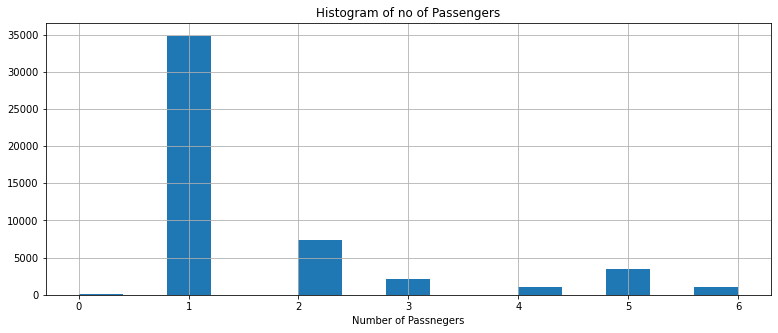

In [ ]:
#Histogram of Passengers
df.no_of_passenger.hist(bins = 15,figsize=(13,5))
plt.xlabel('Number of Passnegers')
plt.title('Histogram of no of Passengers')

Data splitting into training and testing sets

In [ ]:
X = df.drop(["amount"], axis=1)
y = df["amount"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Making predictions using the testset


In [ ]:
scaler = StandardScaler()
model =LinearRegression()
pipe = Pipeline(steps=[('scaler', scaler), ('model', model)], memory = 'tmp')

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(y_pred)

[11.42071744 10.43844318 11.33353409 ... 11.42300057 10.68824017
 11.24130977]


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 91.05745112159056
